In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
#reading the data
data = pd.read_csv('bank_notes.csv')
data.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [3]:
#missing value counts in each of these columns
miss = data.isnull().sum()/len(data)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Series([], dtype: float64)

<Axes: >

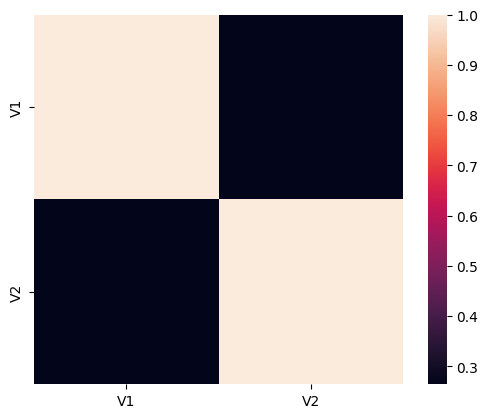

In [4]:
#separate variables into new data frames
numeric_data = data.select_dtypes(include=[np.number])
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr, square=True)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide

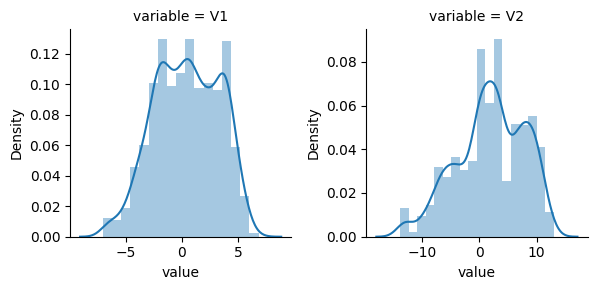

In [5]:
#create numeric plots
num = [f for f in data.columns if data.dtypes[f] != 'object']
nd = pd.melt(data, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [15]:
#training and test datasets
X = data[["variance","skewness","curtosis","entropy"]]
y = data["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "None of [Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')] are in the [columns]"

In [ ]:
# SVM Classifer

clf = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [ ]:
# KNN Classifier

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)

Knn_pred = knn.predict(X_test)
accuracy_score(y_test, Knn_pred)

1.0

In [ ]:
# Random Forest Classifier

rndF = RandomForestClassifier(max_depth=5, random_state=0)
rndF.fit(X_train, y_train)

RndF_pred = rndF.predict(X_test)
accuracy_score(y_test, RndF_pred)

0.9818181818181818